# Hi There
Today, the 29th of September, 2025, I will be analysing the Boston Housing dataset by predicting the house prices based on the provided features in the dataset.

Join me in this ride as we analyze and work with numbers to help realtors in the housing industry.

**1. Importing all necessary libraries**

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression

**2. Dataset Overview**

In [159]:
df_dirty = pd.read_csv('/content/drive/MyDrive/BostonHousing (1).csv')
df_dirty.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [160]:
rows=df_dirty.shape[0]
columns=df_dirty.shape[1]
print(f'The Boston Housing Datset has {rows} rows and {columns} columns')

The Boston Housing Datset has 506 rows and 14 columns


From the above line of code, there are 506 rows and 14 columns in the dataset.

Now, I want to see what these feautres are made up of

In [161]:
df_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


From the result of the above block of code, we see that all features are numeric and the only column with missing values is the RM (Average number of rooms per dwelling) column.

Now, I want to check for missing values or duplicate values

In [162]:
df_dirty.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,5
age,0
dis,0
rad,0
tax,0


There are only 5 missing values, all in RM column

Now, for duplicate values

In [163]:
df_dirty.duplicated().sum()

np.int64(0)

No duplicates. Pheew!!!

**Data Cleaning**

Ok, since the rm column is a numerical column, I want to fill the empty cells with the mean.

In [164]:
df_dirty.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [165]:
df_dirty['rm'].fillna(df_dirty['rm'].mean(), inplace=True)

# Rename the cleaned dataset
df_clean = df_dirty.copy()

# Print the new dataset

df_clean.to_csv('BostonHousing_clean.csv', index=False)

/tmp/ipython-input-912921575.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dirty['rm'].fillna(df_dirty['rm'].mean(), inplace=True)


In [166]:
df_clean.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [167]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [168]:
df_clean.isnull().sum().sum()

np.int64(0)

Great, now the dataset is clean.

**Feature Engineering 1**

In this stage, I want to make use of MI (Mutual Information) Score to get the top 5 features that influence the MEDV (Median House Price), to further build a model.

In [169]:
# Separate features and target
X = df_clean.drop('medv', axis=1)
y = df_clean['medv']

# Compute MI scores
mi_scores = mutual_info_regression(X, y)
mi_scores_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Display top 5 features
top_features = mi_scores_series.head(5).index.tolist()
print("Top 5 features affecting MEDV:", top_features)


Top 5 features affecting MEDV: ['lstat', 'rm', 'indus', 'nox', 'ptratio']


Now, using Linear Regression to build a model

**Train-Test Split**

In [200]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Select top 5 features
X_top = df_clean[top_features]


# Split data
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Model Training**

In [201]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

After training the model, It's time to produce a Linear Regression equation that each of the features in my dataset would be inputted to produce a prediction.

 Afterwards, the prediction would be compared to the actual house price, in order to know how well the model performed

In [171]:
# Coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print regression equation
equation = "MEDV = " + " + ".join([f"{coef:.2f}*{feature}" for coef, feature in zip(coefficients, top_features)])
equation = f"{equation} + {intercept:.2f}"
print("Regression Equation:", equation)


Regression Equation: MEDV = -0.56*lstat + 5.02*rm + 0.08*indus + -4.91*nox + -0.92*ptratio + 16.65


**Model Evaluation**

In [172]:
# Predictions on training set
y_train_pred = model.predict(X_train)

# Training evaluation
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

print(f"Training R² Score: {r2_train:.4f}")
print(f"Training Mean Squared Error (MSE): {mse_train:.4f}")


Training R² Score: 0.6878
Training Mean Squared Error (MSE): 27.1241


*R² measures the proportion of the variance in the target variable (housing prices) that is explained by the model. It ranges from 0 to 1*

In [173]:
# Predictions on test set
y_test_pred = model.predict(X_test)

# Test evaluation
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Test R² Score: {r2_test:.4f}")
print(f"Test Mean Squared Error (MSE): {mse_test:.4f}")


Test R² Score: 0.6290
Test Mean Squared Error (MSE): 27.2071


*Residual Plot*

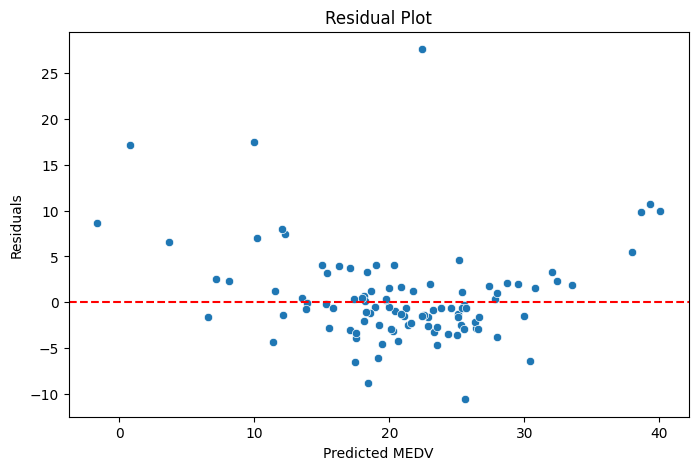

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals = y_test - y_test_pred

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


If Residual (Actual - Predicted) = 0, the model predicted perfectly

If Residual < 0, the model overpredicted

If Residual > 0, the model underpredicted

*Actual vs Predicted Plot*

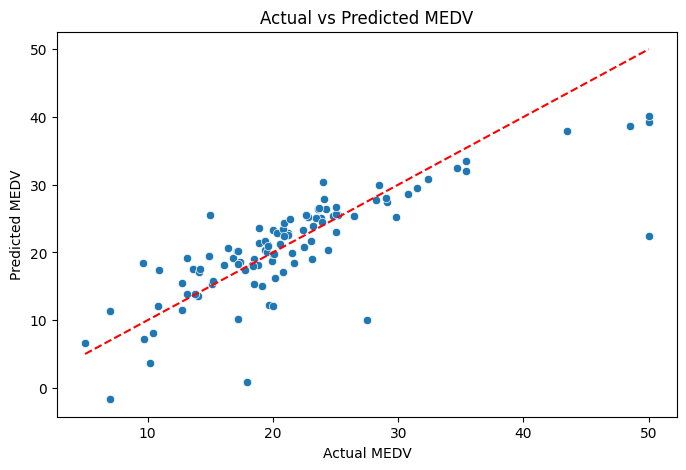

In [175]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted MEDV")
plt.show()


For this graph, red line is the state where the actual values are equal to the predicted values.

**Now, using Random Forest Regressor for the top 5 features**

In [176]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [177]:
# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

In [178]:
# Training evaluation
r2_train_rf = r2_score(y_train, y_train_pred_rf)
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)

In [179]:
# Testing evaluation
r2_test_rf = r2_score(y_test, y_test_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)

In [180]:
# Print results
print("Training Set Evaluation:")
print(f"R² Score: {r2_train_rf:.4f}")
print(f"Mean Squared Error: {mse_train_rf:.4f}\n")


Training Set Evaluation:
R² Score: 0.9744
Mean Squared Error: 2.2202



In [181]:
print("Test Set Evaluation:")
print(f"R² Score: {r2_test_rf:.4f}")
print(f"Mean Squared Error: {mse_test_rf:.4f}")

Test Set Evaluation:
R² Score: 0.8149
Mean Squared Error: 13.5740


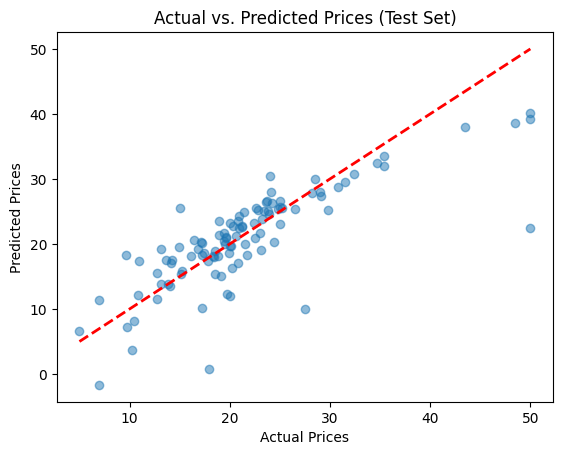

In [199]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are available from your test set predictions
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices (Test Set)')
plt.show()

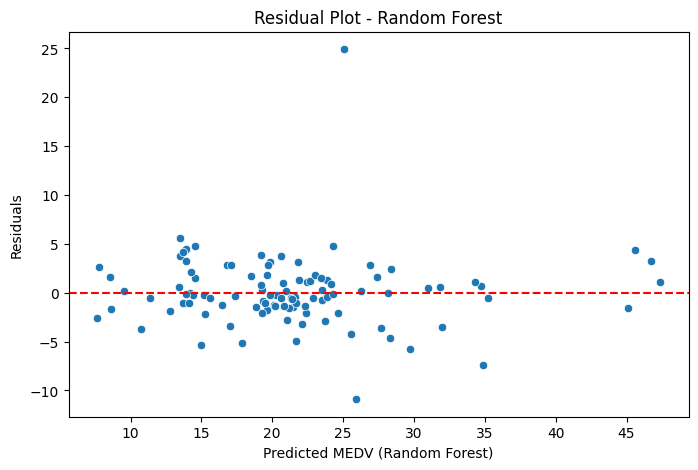

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals_rf = y_test - y_test_pred_rf

# Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred_rf, y=residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted MEDV (Random Forest)")
plt.ylabel("Residuals")
plt.title("Residual Plot - Random Forest")
plt.show()


**Now, using Lasso and Ridge models for the top 5 features**

In [185]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Initialize models
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)

# Fit models
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Predict
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)


In [186]:
# Lasso Evaluation
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)

# Ridge Evaluation
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)

# Print results
print(" Lasso Regression:")
print(f"Training R²: {r2_train_lasso:.4f}, MSE: {mse_train_lasso:.4f}")
print(f"Testing R²: {r2_test_lasso:.4f}, MSE: {mse_test_lasso:.4f}\n")

print(" Ridge Regression:")
print(f"Training R²: {r2_train_ridge:.4f}, MSE: {mse_train_ridge:.4f}")
print(f"Testing R²: {r2_test_ridge:.4f}, MSE: {mse_test_ridge:.4f}")


 Lasso Regression:
Training R²: 0.6861, MSE: 27.2712
Testing R²: 0.6329, MSE: 26.9212

 Ridge Regression:
Training R²: 0.6876, MSE: 27.1384
Testing R²: 0.6297, MSE: 27.1576


In [188]:
# Create a list to store results
results = []

# Define models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Lasso Regression': Lasso(alpha=0.1),
    'Ridge Regression': Ridge(alpha=1.0)
}

# Use top 5 features (assuming you already have top_features)
X_top = df_clean[top_features]
y = df_clean['medv']

# Split data
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Loop through models
for name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    r2_train = r2_score(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # Store results
    results.append({
        'Model': name,
        'R² Train': round(r2_train, 4),
        'MSE Train': round(mse_train, 4),
        'R² Test': round(r2_test, 4),
        'MSE Test': round(mse_test, 4)
    })

# Convert to DataFrame and print
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


               Model  R² Train  MSE Train  R² Test  MSE Test
0  Linear Regression    0.6878    27.1241   0.6290   27.2071
1      Random Forest    0.9744     2.2202   0.8149   13.5740
2   Lasso Regression    0.6861    27.2712   0.6329   26.9212
3   Ridge Regression    0.6876    27.1384   0.6297   27.1576


# Conclusion

**Key Insights**

 **Best Performing Model:** Random Forest
Highest R² on both training (0.9744) and test (0.8149) sets.

Lowest MSE on both training (2.2202) and test (13.5740) sets.

This model captures complex relationships in the data far better than the others.

 Linear, Lasso, and Ridge Regression
All three have similar performance, with R² around 0.68 (train) and 0.63 (test).

Their MSEs are also close, hovering around 27.

These models are simpler and likely underfitting the data—they’re not capturing enough complexity.

 Conclusion
Most Accurate & Best Generalizing Model:

 **Random Forest**

It balances high training accuracy with strong test performance, indicating good generalization.

Least Effective Models: Linear, Lasso, and Ridge

Their performance is nearly identical and significantly lower than Random Forest.

They may be more interpretable, but they sacrifice predictive power.



**Now, to use correlation matrix to drop highly correlated features, and then build models with the result**

In [192]:
# Full feature set
X_full = df_clean.drop('medv', axis=1)

# Split both sets
X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)
X_train_red, X_test_red, _, _ = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


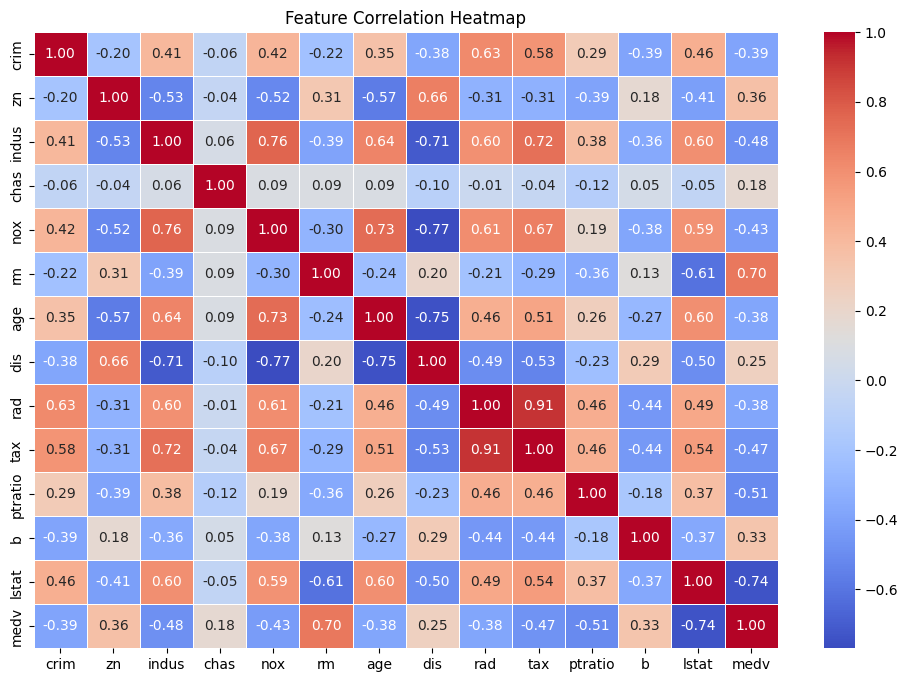

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute correlation matrix
corr_matrix = df_clean.corr()

# Set up the plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add title
plt.title("Feature Correlation Heatmap")
plt.show()

In [190]:
# Compute correlation matrix
corr_matrix = df_clean.drop('medv', axis=1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Drop features with correlation > 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print("Dropped features due to high correlation:", to_drop)

# Reduced feature set
X_reduced = df_clean.drop(columns=to_drop + ['medv'])
y = df_clean['medv']


Dropped features due to high correlation: ['tax']


In [193]:
# Define models
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Store results
results = []

# Loop through models and datasets
for name, model in models.items():
    for version, X_train, X_test in [('Full', X_train_full, X_test_full), ('Reduced', X_train_red, X_test_red)]:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        r2_train = r2_score(y_train, y_train_pred)
        mse_train = mean_squared_error(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)

        results.append({
            'Model': name,
            'Feature Set': version,
            'R² Train': round(r2_train, 4),
            'MSE Train': round(mse_train, 4),
            'R² Test': round(r2_test, 4),
            'MSE Test': round(mse_test, 4)
        })


In [194]:
# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


          Model Feature Set  R² Train  MSE Train  R² Test  MSE Test
0        Linear        Full    0.7504    21.6864   0.6672   24.4048
1        Linear     Reduced    0.7463    22.0355   0.6516   25.5492
2         Ridge        Full    0.7483    21.8688   0.6648   24.5791
3         Ridge     Reduced    0.7440    22.2403   0.6490   25.7391
4         Lasso        Full    0.7377    22.7833   0.6559   25.2312
5         Lasso     Reduced    0.7323    23.2554   0.6371   26.6092
6  RandomForest        Full    0.9770     2.0005   0.8929    7.8535
7  RandomForest     Reduced    0.9765     2.0389   0.8892    8.1279


Model-by-Model Breakdown
1. Linear Regression
Full Features: R² Test = 0.6672, MSE Test = 24.4048

Reduced Features: Slight drop in performance (R² = 0.6516, MSE = 25.5492)

Insight: Linear regression performs moderately well. Dropping correlated features slightly hurts performance, suggesting those features were contributing useful information.

Ridge Regression
Full Features: R² Test = 0.6648, MSE Test = 24.5791

Reduced Features: R² = 0.6490, MSE = 25.7391

Insight: Ridge is nearly identical to Linear Regression. It adds regularization to prevent overfitting, but in this case, the benefit is minimal. Again, reducing features slightly degrades performance.

3. Lasso Regression
Full Features: R² Test = 0.6559, MSE Test = 25.2312

Reduced Features: R² = 0.6371, MSE = 26.6092

Insight: Lasso performs slightly worse than Ridge and Linear. It’s more aggressive in shrinking coefficients, which can help with feature selection—but here, it may be discarding useful information.

4. Random Forest
Full Features: R² Test = 0.8929, MSE Test = 7.8535

Reduced Features: R² = 0.8892, MSE = 8.1279

Insight: Random Forest is the clear winner. It captures complex, nonlinear relationships that linear models miss. Even after dropping correlated features, it maintains excellent performance—showing robustness and generalization.

Key Takeaways

 Best Model Overall:

# **Random Forest**

Highest R² and lowest MSE on both training and test sets.

Handles full and reduced feature sets with minimal performance loss.

Ideal for predictive accuracy, especially when interpretability isn’t the top priority.

Linear, Ridge, and Lasso


These models are simpler and more interpretable.

They struggle to capture complex patterns in your data.

Performance drops slightly when features are reduced—suggesting that correlated features were still informative.

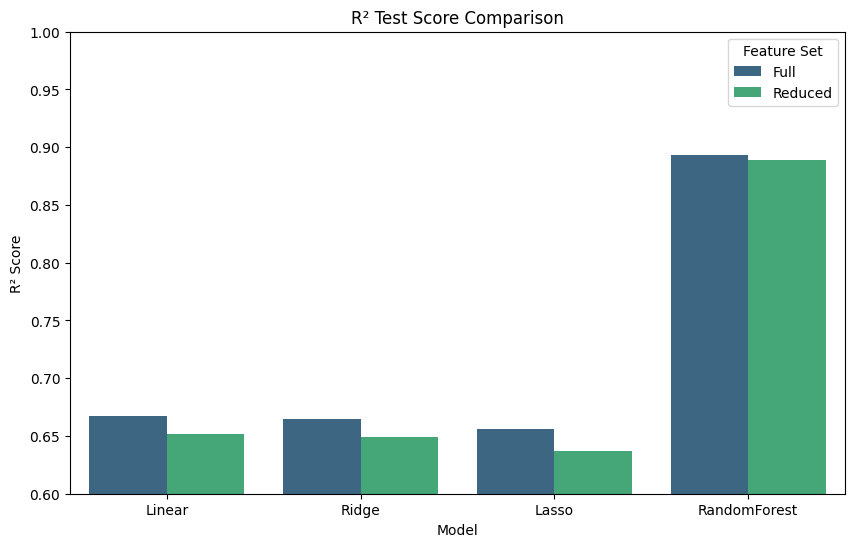

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Your results data
results_data = {
    'Model': ['Linear', 'Linear', 'Ridge', 'Ridge', 'Lasso', 'Lasso', 'RandomForest', 'RandomForest'],
    'Feature Set': ['Full', 'Reduced'] * 4,
    'R² Train': [0.7504, 0.7463, 0.7483, 0.7440, 0.7377, 0.7323, 0.9770, 0.9765],
    'R² Test': [0.6672, 0.6516, 0.6648, 0.6490, 0.6559, 0.6371, 0.8929, 0.8892]
}

df = pd.DataFrame(results_data)

# Plot R² Test Scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R² Test', hue='Feature Set', data=df, palette='viridis')
plt.title("R² Test Score Comparison")
plt.ylabel("R² Score")
plt.ylim(0.6, 1.0)
plt.legend(title='Feature Set')
plt.show()


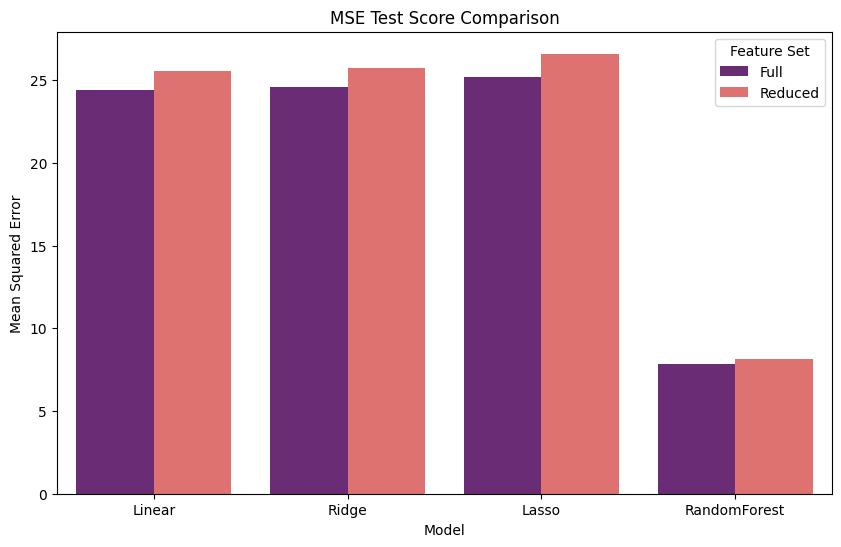

In [198]:
# Add MSE data
df['MSE Test'] = [24.4048, 25.5492, 24.5791, 25.7391, 25.2312, 26.6092, 7.8535, 8.1279]

# Plot MSE Test Scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE Test', hue='Feature Set', data=df, palette='magma')
plt.title("MSE Test Score Comparison")
plt.ylabel("Mean Squared Error")
plt.legend(title='Feature Set')
plt.show()


Simply put, if the R² is closer to one and the MSE score is lower, it signifies predictive accuracy.

In this analysis, **Random Forest** has those features, and that is why it stands out

There you have it.

# I remain, Miss Atinuke Towoju

Stay blessed😊